********************************************************************************
## Exploratory data analysis on the dataset from Hugging Face
**Description:** This notebook does the data wrangling and generates the **word cloud** for the prompts related to depression problem

**Dataset used:** Train dataset of wdli/Reddit_depression_dataset
Link to the dataset --> https://huggingface.co/datasets/wdli/Reddit_depression_dataset/viewer/default/train

**Use:** This provides a visual summary that aids in identifying prevalent symptoms, emotional experiences, coping strategies, risk factors, and support needs related to depression. It serves as a starting point for deeper analysis and targeted interventions aimed at improving mental health outcomes.
********************************************************************************

### Installing the required libraries

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

### Importing the required libraries

In [2]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk

In [3]:
# Load the dataset from Hugging face
# ensure you have the Hugging face token saved in secrets in google colab
dataset = load_dataset('wdli/Reddit_depression_dataset')
dataset

Generating train split:   0%|          | 0/2842 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/355 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/356 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2842
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 355
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 356
    })
})

In [25]:
# Accessing the training split
train_dataset = dataset['train']

In [26]:
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 2842
})

In [27]:
df = pd.DataFrame(train_dataset) #Reading as a pandas dataframe
df

,text,label
0,so i finally got tired of being anxious and de...,mild
1,"My best friend died last year, of a rare type ...",minimum
2,And I'll get an intense feeling of impending d...,moderate
3,"I am employed full time. I have money, but I a...",minimum
4,"So I've had PTSD a few years now, coming up on...",minimum
...,...,...
2837,- Your letter or email has a medium-chance of ...,minimum
2838,I need to make a decision now. My whole course...,minimum
2839,"I was told by my peers, the media, so many thi...",minimum
2840,"I then joined a few suport groups online, but ...",severe


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2842 non-null   object
 1   label   2842 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [29]:
df['label'].value_counts()

label
minimum     2063
moderate     323
mild         232
severe       224
Name: count, dtype: int64

### Removing the columns with label=minimum to get the exact picture of the words in word cloud

In [30]:
df_new = df.loc[np.where(df['label']!="minimum")]
df_new

,text,label
0,so i finally got tired of being anxious and de...,mild
2,And I'll get an intense feeling of impending d...,moderate
7,"I relate to a lot of the symptoms, but what ha...",moderate
10,"Hi r/anxiety, So lately my anxiety/hypochondri...",moderate
14,"Etc etc etc. "". My brain takes this one little...",severe
...,...,...
2827,I'm new to Reddit and have only really discuss...,mild
2830,But this incident has been troubling me for a ...,mild
2831,“Either be my girlfriend or be out of my life”...,mild
2832,"I'm constantly worrying, snapping off at my ki...",moderate


In [31]:
df_new['label'].value_counts()

label
moderate    323
mild        232
severe      224
Name: count, dtype: int64

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Cleaning dataset: Removing the punctuation and stopwords from the text column of the dataframe

In [58]:
# clean data - we don't want any stop words, punctuations, html tags etc on our dataset
import re
from string import punctuation
from nltk.corpus import stopwords
stop_w = set(stopwords.words('english') + ['youre','im','lets','would','etc','i\'ve','i\'m','ive'])
def clean_text(text):
    text = text.lower()
    #pattern = re.compile('<.*?>')
    #text = pattern.sub(r'',text) # remove html tags

    text = ''.join([c for c in text if c not in punctuation]) # remove punctuations
    text = [word for word in text.split() if word not in stop_w] # remove stopwords
    text = ' '.join(text)
    return text

In [59]:
df_new['clean_text']=df_new['text'].apply(clean_text)
df_new

,text,label,clean_text
0,so i finally got tired of being anxious and de...,mild,finally got tired anxious depressed crying dai...
2,And I'll get an intense feeling of impending d...,moderate,ill get intense feeling impending doom lasts l...
7,"I relate to a lot of the symptoms, but what ha...",moderate,relate lot symptoms happened wasnt life threat...
10,"Hi r/anxiety, So lately my anxiety/hypochondri...",moderate,hi ranxiety lately anxietyhypochondria roof co...
14,"Etc etc etc. "". My brain takes this one little...",severe,brain takes one little choice go back water bl...
...,...,...,...
2827,I'm new to Reddit and have only really discuss...,mild,new reddit really discussed issues trauma ptsd...
2830,But this incident has been troubling me for a ...,mild,incident troubling couple days guess sick tire...
2831,“Either be my girlfriend or be out of my life”...,mild,“either girlfriend life” fwb told refused girl...
2832,"I'm constantly worrying, snapping off at my ki...",moderate,constantly worrying snapping kids even total s...


In [60]:
corpus_prompt = [word for text in df_new['clean_text'] for word in text.split()] #convert all text to list of words

In [61]:
from collections import Counter
count_words = Counter(corpus_prompt)

In [62]:
sorted_words = count_words.most_common(len(count_words))  #retrieve a list of word-frequency pairs sorted by frequency in descending order.

In [66]:
# top 20 occuring words
keys= []
values = []
for key,value in sorted_words[:20]:
    keys.append(key)
    values.append(value)

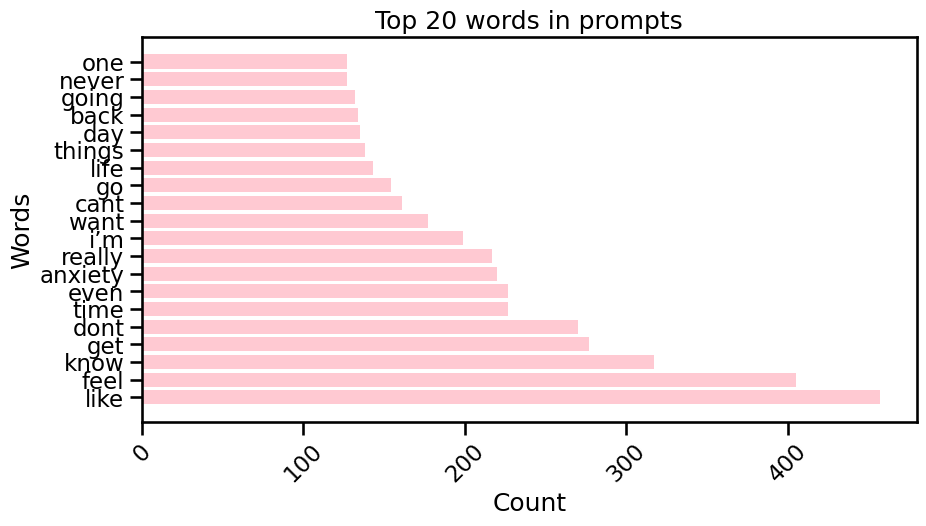

In [68]:
plt.figure(figsize = (10,5))
plt.barh(keys,values,color = 'pink', alpha = 0.85)
palette=("Blues_d")
plt.xlabel('Count')
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.title('Top 20 words in prompts')
sns.set_context('talk');

### Generating word cloud for depression

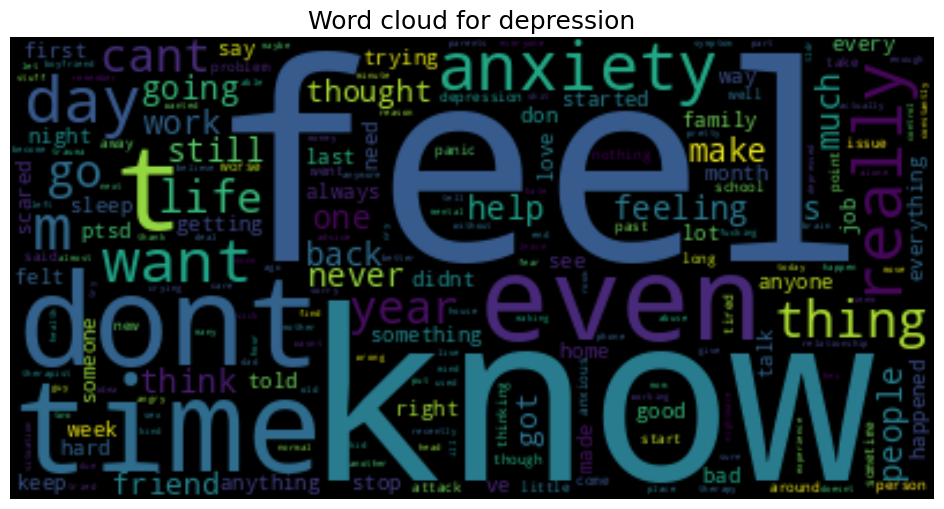

In [70]:
from wordcloud import WordCloud
fig, axs = plt.subplots(1,1 , figsize=(18,6))
clean_pr = " ".join(df_new['clean_text'])
pr_cloud = WordCloud(collocations = False, background_color = 'black').generate(clean_pr)
axs.imshow(pr_cloud, interpolation='bilinear')
axs.axis('off')
axs.set_title('Word cloud for depression')

plt.show()